Problem statement:
The Big Market have collected sales for different products across 10 stores and need to build a predictive model to know the properties of these products and then, improve its sales as the model prediction results. We will use a regression model to solve this problem and enhance the trend of products sales across the different stores. The Objective of the problem is to aid the market enhancing its sales across the time and expected results is a relation between the different features collected and be powerful model. 

In [1]:
##Loading Packages and Data

# data manipulation
from optparse import Values
import pandas as pd
import numpy as np

# data visualization
import matplotlib.pyplot as plt

import seaborn as sns

import fuzzywuzzy
from fuzzywuzzy import process
import chardet

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


#read the data
Data= pd.read_csv("Train.csv")
test_data=pd.read_csv("Test.csv")






# set seed for reproducibility
np.random.seed(0) 

In [2]:
#Data structure and content
print(Data.head())

Data.duplicated().sum()   #check if there are any duplicated rows
Data.info()
Data.describe()
Data.shape





  Item_Identifier  Item_Weight Item_Fat_Content  Item_Visibility  \
0           FDA15         9.30          Low Fat         0.016047   
1           DRC01         5.92          Regular         0.019278   
2           FDN15        17.50          Low Fat         0.016760   
3           FDX07        19.20          Regular         0.000000   
4           NCD19         8.93          Low Fat         0.000000   

               Item_Type  Item_MRP Outlet_Identifier  \
0                  Dairy  249.8092            OUT049   
1            Soft Drinks   48.2692            OUT018   
2                   Meat  141.6180            OUT049   
3  Fruits and Vegetables  182.0950            OUT010   
4              Household   53.8614            OUT013   

   Outlet_Establishment_Year Outlet_Size Outlet_Location_Type  \
0                       1999      Medium               Tier 1   
1                       2009      Medium               Tier 3   
2                       1999      Medium               Tier

(8523, 12)

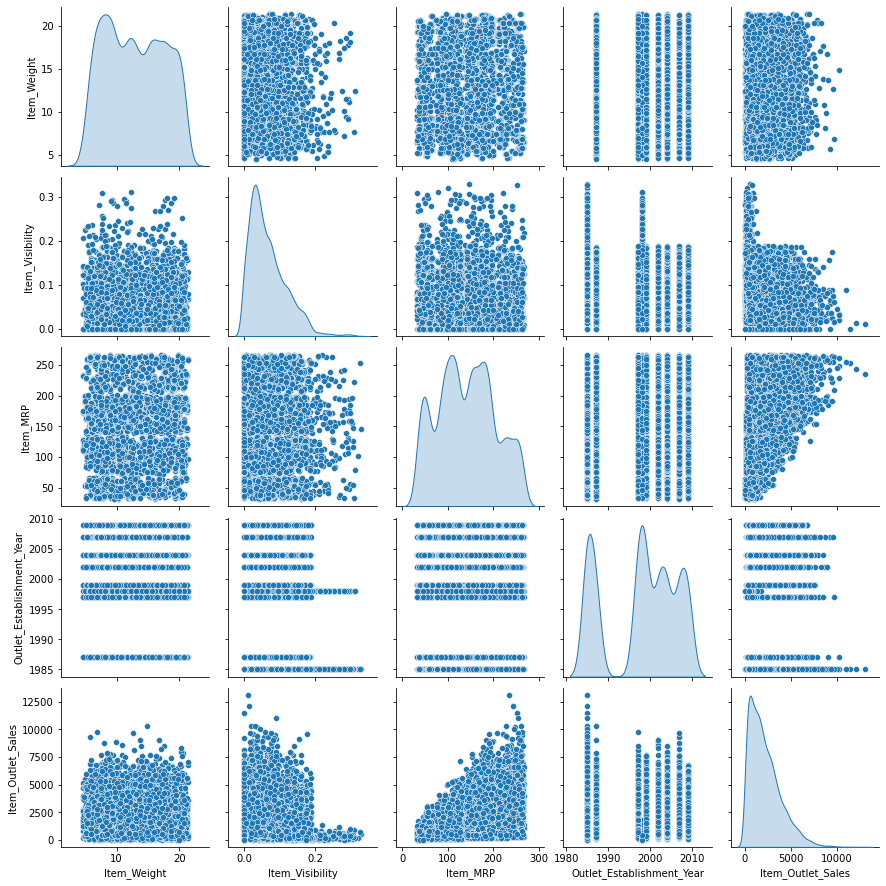

In [3]:
sns.pairplot(data=Data, diag_kind='kde')

1.Negative correlation between item_outlet_sales and item_visibility
2.positive correlation between item_mpr and its sales
3.positive correlation between mpr and year_sales


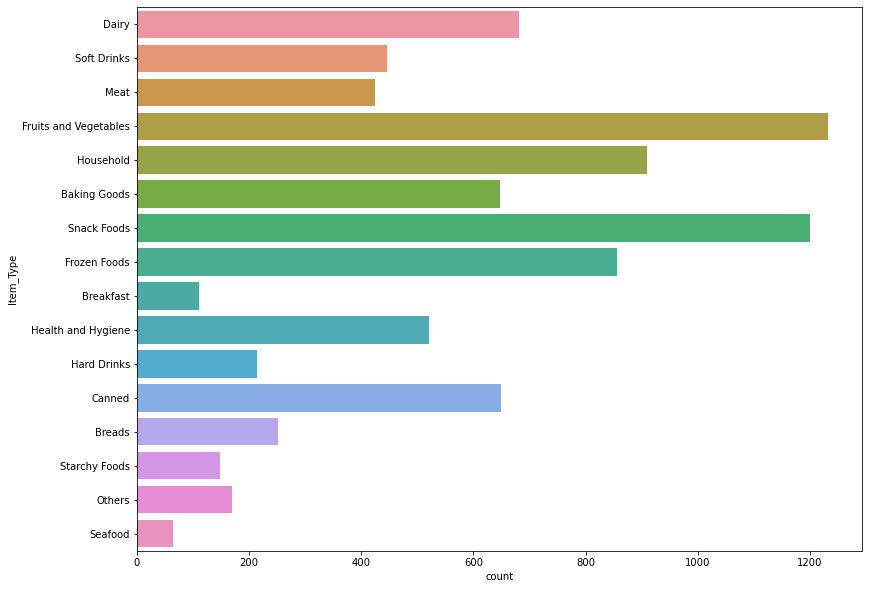

In [5]:
plt.figure(figsize=(13,10))
ay = sns.countplot(y="Item_Type", data=Data)     # most item type in the data is fruits and vegetables and the less is seafood

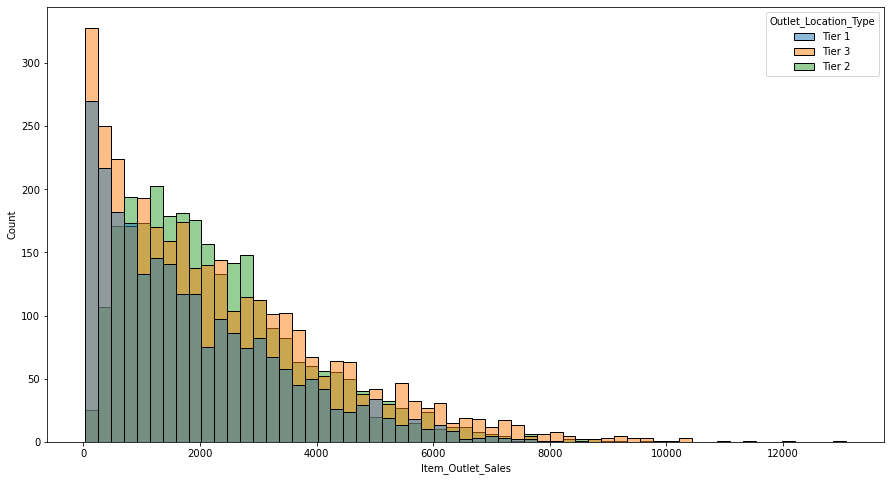

In [6]:
plt.figure(figsize=(15,8))
location_type=sns.histplot(data=Data, x="Item_Outlet_Sales",hue="Outlet_Location_Type" )   

Tier3 is the best location to sale more

from the describtion of the numerical data.........> there're outliers with huge std  in the item mpr and item_outlet_sales so we should deal with these outliers later on in the filtration and cleaning.

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

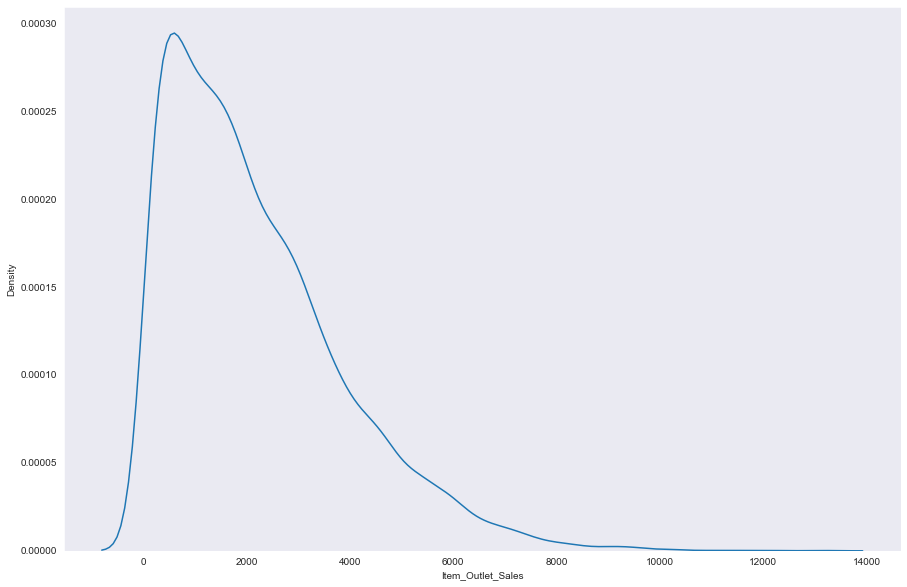

In [7]:
#univariate analysis
plt.figure(figsize=(15,10))
sns.set_style('dark')
sns.kdeplot(data=Data['Item_Outlet_Sales'])  #............Right skewed 

#most of the sales -----> less than 4000 and the highst density around 2000

<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Item_Outlet_Sales'>

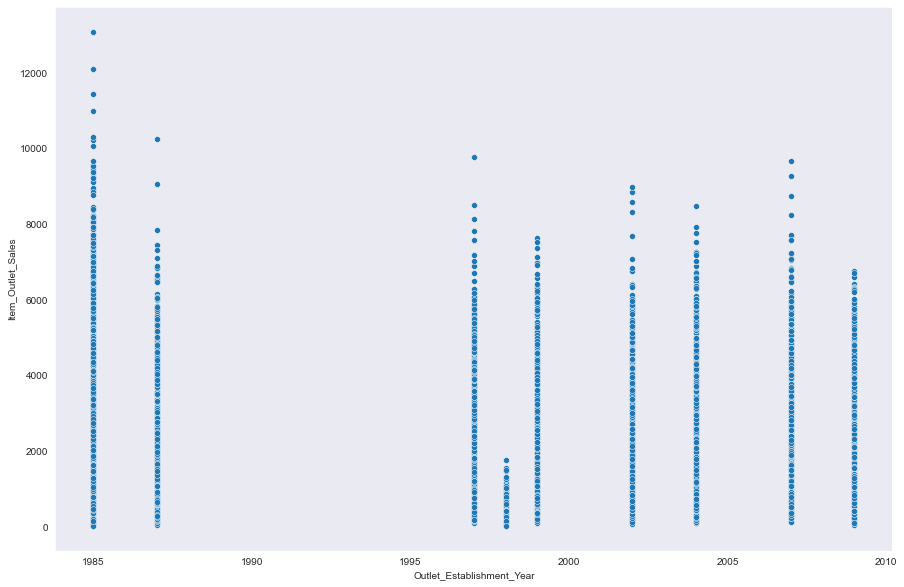

In [8]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=Data['Outlet_Establishment_Year'], y=Data['Item_Outlet_Sales'])
#we haven't any clear correlation between year and sales so, we may consider it isn't important     

<AxesSubplot:xlabel='Item_MRP', ylabel='Count'>

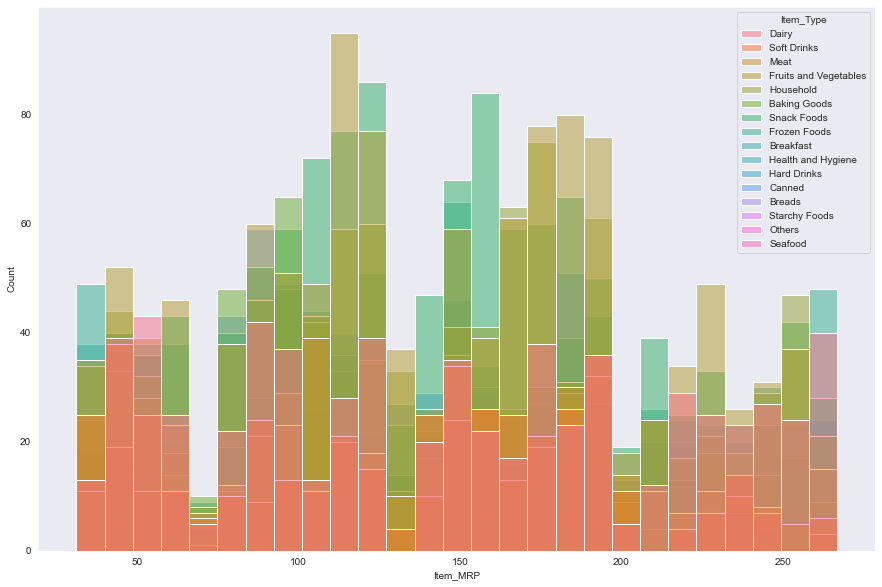

In [9]:
plt.figure(figsize=(15,10))
sns.histplot(data=Data, x='Item_MRP', hue='Item_Type')   # most mpr for baking goods , Dairy and household and snack foods


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

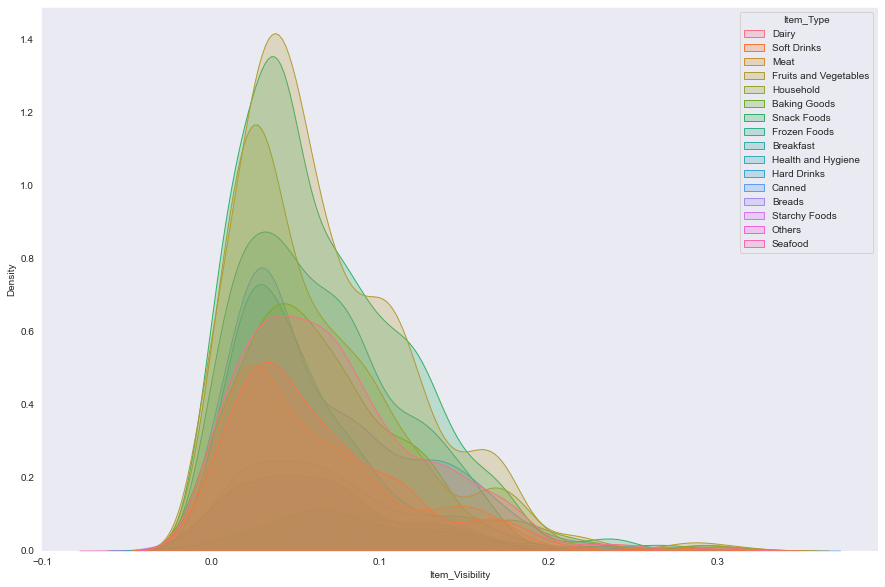

In [10]:
plt.figure(figsize=(15, 10))
sns.kdeplot(data=Data, x='Item_Visibility', hue='Item_Type', shade=True)    #most visibilty items are meat, fruits and vegetables and baking goods 


Let's start with Bivariate analyis and try to undarstand the correlation between the attributes


c:\Users\Start\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 31.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
c:\Users\Start\anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 34.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<AxesSubplot:xlabel='Outlet_Size', ylabel='Item_Outlet_Sales'>

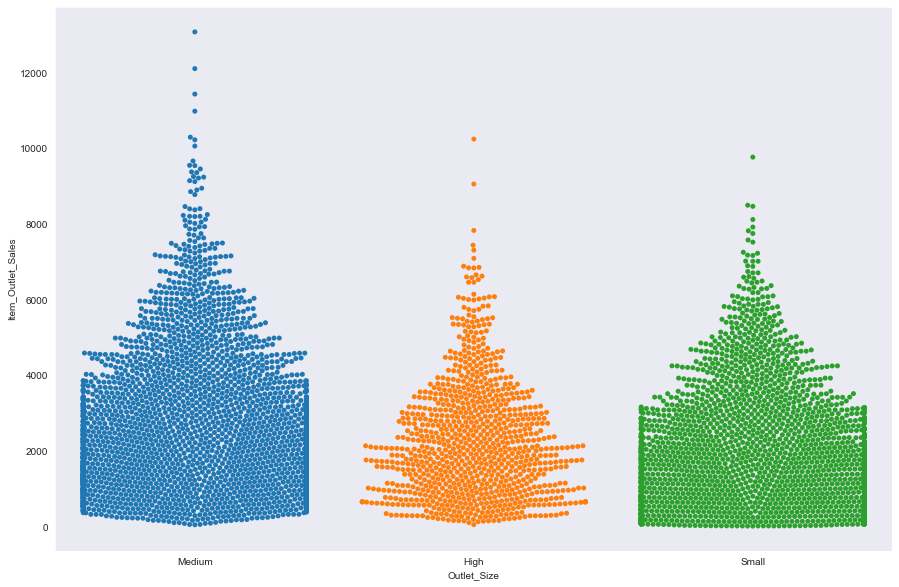

In [11]:
#the relation betwwen outlet_size and the sales shows that most of data is medium and now we must guess the Nan values
plt.figure(figsize=(15,10))
sns.swarmplot(x=Data['Outlet_Size'],y=Data['Item_Outlet_Sales'])

<AxesSubplot:xlabel='Item_MRP', ylabel='Item_Outlet_Sales'>

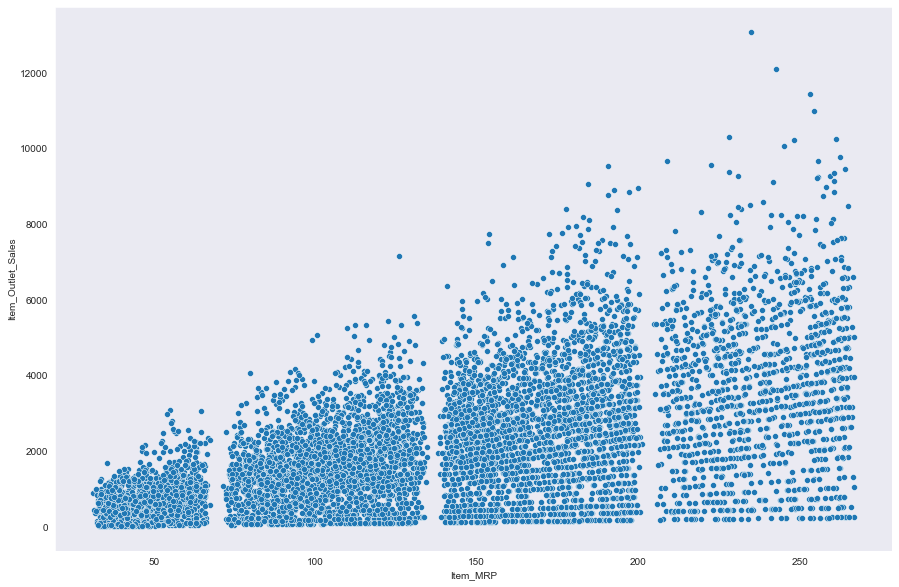

In [12]:
plt.figure(figsize=(15,10))
sns.scatterplot(x=Data['Item_MRP'], y=Data['Item_Outlet_Sales'])    #positive correlation between mpr and sales

<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Visibility'>

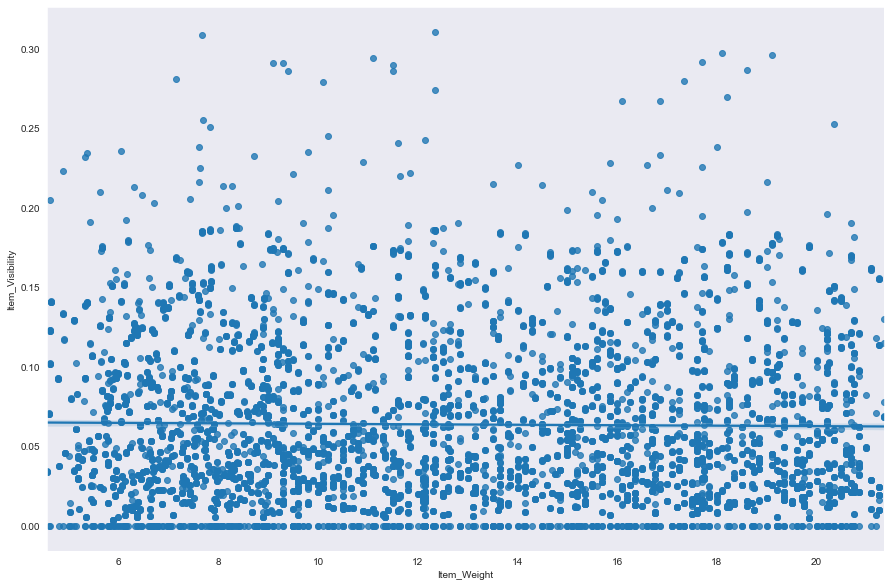

In [13]:
#the correlation between item weight and item visibility
plt.figure(figsize=(15,10))
sns.regplot(x=Data['Item_Weight'], y=Data['Item_Visibility'])


<AxesSubplot:xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

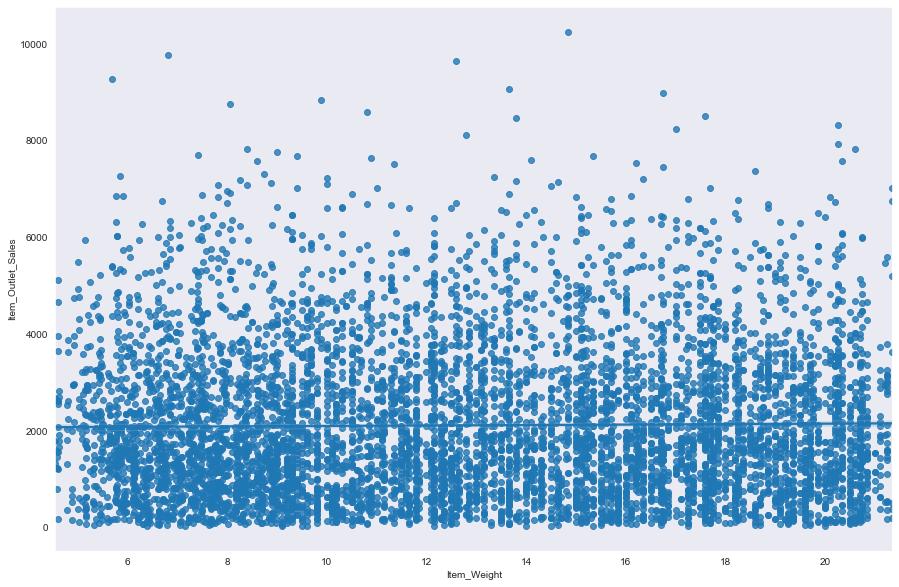

In [9]:
plt.figure(figsize=(15,10))
sns.regplot(x=Data['Item_Weight'], y=Data['Item_Outlet_Sales']) 
#item weight isn't an important feature.there isn't any correlation or trend so, we may exclude it    

<AxesSubplot:xlabel='Item_Visibility', ylabel='Item_Outlet_Sales'>

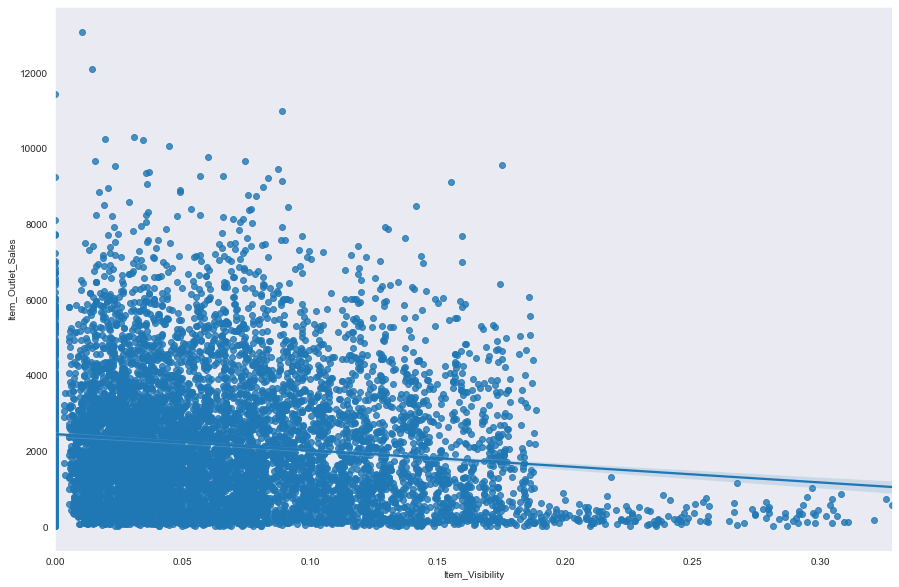

In [10]:
plt.figure(figsize=(15,10))
sns.regplot(x=Data['Item_Visibility'], y=Data['Item_Outlet_Sales'])  #negative correlation between item visibility and sale

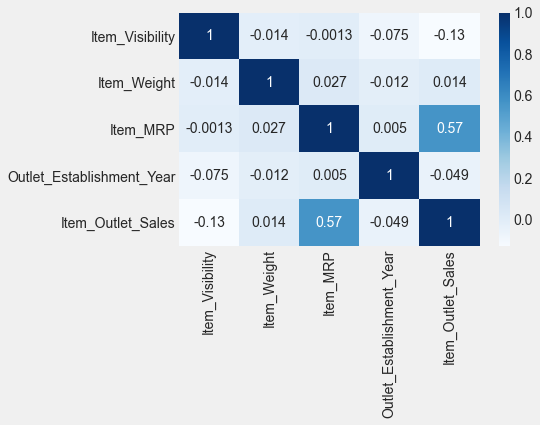

In [92]:
sns.heatmap(Data[['Item_Visibility', 'Item_Weight', 'Item_MRP','Outlet_Establishment_Year', 'Item_Outlet_Sales']].corr(), cmap='Blues', annot=True)
plt.show()

from heatmap we may remove both item_weight and establishment_year through feature selection to enhance the model

Data Cleaning


In [14]:
#missing data treatment
missing_Data_Count=Data.isnull().sum()
print(missing_Data_Count)     #  1463 null data in the item_weight and 2410 missing in the outlet_size
Total_Data=np.product(Data.shape)
missing_Data_num=missing_Data_Count.sum()
missing_Percentage=(missing_Data_num/Total_Data)*100
missing_Percentage



Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64


3.786812155344362

In [15]:
missing_data_count_test=test_data.isnull().sum()
print(missing_data_count_test)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64


In [16]:
#filling the missing data of item weight with medium value mean
updated_df = Data
updated_df['Item_Weight']=updated_df['Item_Weight'].fillna(updated_df['Item_Weight'].median())
updated_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
#filling the NaNs of outlet_size using categorical imputer of numpy

# handling NaN values
#creates a random permuation of the categorical values
permutation = np.random.permutation(updated_df['Outlet_Size'])

#erase the empty values
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)

#replace all empty values of the dataframe[field]
end = len(permutation)
updated_df['Outlet_Size'] = updated_df['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)
updated_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [22]:
#..................check inconsistent data

#a function to convert both lower and white spaces
def convert_lower_spaces(df,column):
    df[column] =df[column].str.lower()
    df[column] =df[column].str.strip()
    
# convert to lower case & white spaces for train data
convert_lower_spaces(updated_df,'Item_Fat_Content')
convert_lower_spaces(updated_df,'Item_Type')
convert_lower_spaces(updated_df,'Outlet_Identifier')
convert_lower_spaces(updated_df,'Outlet_Size')
convert_lower_spaces(updated_df,'Outlet_Location_Type')
convert_lower_spaces(updated_df,'Outlet_Type')


#unique columns to check the repetition of words meaning
item_type=updated_df['Outlet_Type'].unique()     #dooone 
item_type.sort()
#item_type

Outlet_Location_Type=updated_df['Outlet_Location_Type'].unique()   #dooone 
Outlet_Location_Type.sort()
#Outlet_Location_Type

item_fat_content=updated_df['Item_Fat_Content'].unique()   #  low fat and lf are the same &   reg and regular are the same so, let's rename it to be the same meanning   
item_fat_content.sort()
#item_fat_content

updated_data=updated_df.copy()
updated_data['Item_Fat_Content'] = updated_data['Item_Fat_Content'].replace(['lf','reg'],['low fat','regular'])

#check that now i have that column unique
item_fat_content=updated_data['Item_Fat_Content'].unique()    
item_fat_content.sort()
item_fat_content   ##done now unique

array(['low fat', 'regular'], dtype=object)

#outliers deletion

c:\Users\Start\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Outlet_Sales'>

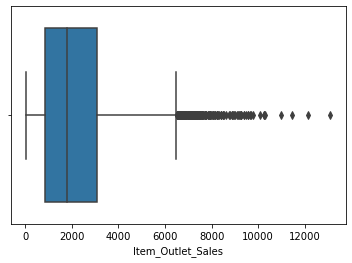

In [24]:

sns.boxplot(updated_data['Item_Outlet_Sales'])


In [23]:
def outliers(df, feature):
    Q1= df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    upper_limit = Q3 + 1.5 * IQR
    lower_limit = Q1 - 1.5 * IQR
    return upper_limit, lower_limit

upper, lower = outliers(updated_data, "Item_Outlet_Sales")
print("Upper whisker: ", upper)
print("Lower Whisker: ", lower)

def remove_outliers(upper,lower,column,df):
    updatedd_data_one = df[(df[column] > lower) & (df[column] < upper)]
    return updatedd_data_one 

Upper whisker:  6501.8699
Lower Whisker:  -2566.3261


In [24]:
#let's take look at outliers
updated_data[(updated_data['Item_Outlet_Sales'] < lower) | (updated_data['Item_Outlet_Sales'] > upper)]
#remove these outliers of Item_outlet_sales from dataset
updated_data_one=remove_outliers(upper,lower,'Item_Outlet_Sales',updated_data)
#updated_data_one = updated_data[(updated_data['Item_Outlet_Sales'] > lower) & (updated_data['Item_Outlet_Sales'] < upper)]
updated_data_one

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.1380
1,DRC01,5.920,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.4228
2,FDN15,17.500,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.2700
3,FDX07,19.200,regular,0.000000,fruits and vegetables,182.0950,out010,1998,small,tier 3,grocery store,732.3800
4,NCD19,8.930,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,snack foods,214.5218,out013,1987,high,tier 3,supermarket type1,2778.3834
8519,FDS36,8.380,regular,0.046982,baking goods,108.1570,out045,2002,high,tier 2,supermarket type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,health and hygiene,85.1224,out035,2004,small,tier 2,supermarket type1,1193.1136
8521,FDN46,7.210,regular,0.145221,snack foods,103.1332,out018,2009,medium,tier 3,supermarket type2,1845.5976


c:\Users\Start\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Item_Visibility'>

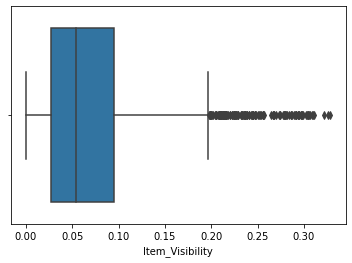

In [11]:
#by the same way let's treat outliers of mpr
sns.boxplot(updated_data_one['Item_Visibility'])

In [25]:
upperr, lowerr = outliers(updated_data_one, "Item_Visibility")
print("Upper whisker: ", upperr)
print("Lower Whisker: ", lowerr)

Upper whisker:  0.19770463800000004
Lower Whisker:  -0.07537746600000003


In [26]:
#let's take look at outliers of Item_visibility
updated_data_one[(updated_data_one['Item_Visibility'] < lower) | (updated_data_one['Item_Visibility'] > upper)]
#remove these outliers from dataset
updated_data_final = remove_outliers(upperr,lowerr,'Item_Visibility',updated_data_one)
updated_data_final

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,dairy,249.8092,out049,1999,medium,tier 1,supermarket type1,3735.1380
1,DRC01,5.920,regular,0.019278,soft drinks,48.2692,out018,2009,medium,tier 3,supermarket type2,443.4228
2,FDN15,17.500,low fat,0.016760,meat,141.6180,out049,1999,medium,tier 1,supermarket type1,2097.2700
3,FDX07,19.200,regular,0.000000,fruits and vegetables,182.0950,out010,1998,small,tier 3,grocery store,732.3800
4,NCD19,8.930,low fat,0.000000,household,53.8614,out013,1987,high,tier 3,supermarket type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,low fat,0.056783,snack foods,214.5218,out013,1987,high,tier 3,supermarket type1,2778.3834
8519,FDS36,8.380,regular,0.046982,baking goods,108.1570,out045,2002,high,tier 2,supermarket type1,549.2850
8520,NCJ29,10.600,low fat,0.035186,health and hygiene,85.1224,out035,2004,small,tier 2,supermarket type1,1193.1136
8521,FDN46,7.210,regular,0.145221,snack foods,103.1332,out018,2009,medium,tier 3,supermarket type2,1845.5976


In [29]:
#still there are nans across outlet_size
#filling the NaNs of outlet_size using categorical imputer of numpy

# handling NaN values
#creates a random permuation of the categorical values
permutation = np.random.permutation(updated_data_final['Outlet_Size'])

#erase the empty values
empty_is = np.where(permutation == "")
permutation = np.delete(permutation, empty_is)

#replace all empty values of the dataframe[field]
end = len(permutation)
updated_data_final['Outlet_Size'] = updated_data_final['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)
updated_data_final.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8196 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8196 non-null   object 
 1   Item_Weight                8196 non-null   float64
 2   Item_Fat_Content           8196 non-null   object 
 3   Item_Visibility            8196 non-null   float64
 4   Item_Type                  8196 non-null   object 
 5   Item_MRP                   8196 non-null   float64
 6   Outlet_Identifier          8196 non-null   object 
 7   Outlet_Establishment_Year  8196 non-null   int64  
 8   Outlet_Size                8196 non-null   object 
 9   Outlet_Location_Type       8196 non-null   object 
 10  Outlet_Type                8196 non-null   object 
 11  Item_Outlet_Sales          8196 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 832.4+ KB


<ipython-input-29-bc0a22bb8e51>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_data_final['Outlet_Size'] = updated_data_final['Outlet_Size'].apply(lambda x: permutation[np.random.randint(end)] if pd.isnull(x) else x)


Feature Engineering

In [134]:
df_uppdated=updated_data.copy()
#feature selection and drop the less correlation with the target
df_uppdated.drop([ 'Item_Weight','Outlet_Establishment_Year'] , axis=1, inplace=True)


In [136]:
#2..Encoding the categorical data
features_hotencode=df_uppdated[['Item_Identifier', 'Outlet_Identifier','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']]
features_encoded_df = pd.get_dummies(features_hotencode)
df_uppdated=pd.concat([df_uppdated,features_encoded_df], axis=1)
df_uppdated.drop(columns=features_hotencode, inplace=True)

df_uppdated.Item_Fat_Content.replace(to_replace=['low fat','regular'],value=[0,1], inplace=True)

df_uppdated


,Item_Fat_Content,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DRA12,Item_Identifier_DRA24,Item_Identifier_DRA59,Item_Identifier_DRB01,Item_Identifier_DRB13,Item_Identifier_DRB24,...,Outlet_Size_high,Outlet_Size_medium,Outlet_Size_small,Outlet_Location_Type_tier 1,Outlet_Location_Type_tier 2,Outlet_Location_Type_tier 3,Outlet_Type_grocery store,Outlet_Type_supermarket type1,Outlet_Type_supermarket type2,Outlet_Type_supermarket type3
0,0,0.016047,249.8092,3735.1380,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
1,1,0.019278,48.2692,443.4228,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0
2,0,0.016760,141.6180,2097.2700,0,0,0,0,0,0,...,0,1,0,1,0,0,0,1,0,0
3,1,0.000000,182.0950,732.3800,0,0,0,0,0,0,...,0,0,1,0,0,1,1,0,0,0
4,0,0.000000,53.8614,994.7052,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,0,0.056783,214.5218,2778.3834,0,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
8519,1,0.046982,108.1570,549.2850,0,0,0,0,0,0,...,1,0,0,0,1,0,0,1,0,0
8520,0,0.035186,85.1224,1193.1136,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
8521,1,0.145221,103.1332,1845.5976,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,1,0


In [138]:
#splitting features and target into train and test data
features=df_uppdated.iloc[:,df_uppdated.columns != 'Item_Outlet_Sales'].values
target=df_uppdated.Item_Outlet_Sales.values


Now the dataset has been cleaned
#Let's start with preprocessing stage and encoding

In [142]:

XX_train, XX_test, yy_train, yy_test = train_test_split(features, target, test_size = 0.25)


x=pd.DataFrame(XX_train)
x

,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
0,0.0,0.182654,243.0196,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.084273,181.7292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.024343,113.6176,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.046960,111.8570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.021185,189.5530,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,0.015485,211.9928,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6388,0.0,0.160217,93.5120,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6389,1.0,0.182407,109.1570,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6390,1.0,0.086906,78.8644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [149]:
#Scaling numeric features using sklearn standardscalar
from sklearn.preprocessing import StandardScaler

Sc=StandardScaler()
XX_train[:,[2]]=Sc.fit_transform(XX_train[:,[2]])
XX_test[:,[2]]=Sc.transform(XX_test[:,[2]])

xx_train=pd.DataFrame(XX_train)
xx_train


,0,1,2,3,4,5,6,7,8,9,...,1588,1589,1590,1591,1592,1593,1594,1595,1596,1597
0,0.0,0.182654,1.638640,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,0.084273,0.654695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.024343,-0.438757,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.046960,-0.467021,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,0.021185,0.780297,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6387,0.0,0.015485,1.140541,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6388,0.0,0.160217,-0.761528,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
6389,1.0,0.182407,-0.510366,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
6390,1.0,0.086906,-0.996678,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [150]:
#Apply simple regression model by using sklearn library

linreg=LinearRegression()
linreg.fit(XX_train,yy_train)

LinearRegression()

In [151]:
r2_score = linreg.score(XX_train,yy_train)
print(r2_score*100,'%')

67.05281181488726 %


In [152]:
#predict the test results
y_pred=linreg.predict(XX_test)
y_pred         #i will try to solve the error and resubmit rest of the project but i checked both nans and infinite actually

array([5523.9296875, -252.140625 , 1098.7734375, ..., 4425.71875  ,
       2219.7578125, 4505.328125 ])

In [153]:
#model performance
from sklearn.metrics import r2_score, mean_squared_error
mse = mean_squared_error(yy_test, y_pred)
r2 = r2_score(yy_test, y_pred)#Best fit lineplt.scatter(x, y)
#plt.plot(XX_test, y_pred, color = 'Black', marker = 'o')


In [155]:
#Results
print("Mean Squared Error : ", mse)
print("R-Squared :" , r2)
print("Y-intercept :"  , linreg.intercept_)
print("Slope :" , linreg.coef_)


Mean Squared Error :  1.2274923325512472e+29
R-Squared : -4.103221466492428e+22
Y-intercept : -41401586832124.73
Slope : [ 3.19187386e+12 -7.66558594e+02 -2.40339844e+02 ... -6.07648769e+13
 -3.21772946e+14 -6.28659293e+13]


Random forest regression

In [156]:

# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor_randomforest = RandomForestRegressor(n_estimators= 1000 )
  


In [157]:
regressor_randomforest.fit(XX_train,yy_train)

RandomForestRegressor(n_estimators=1000)

In [158]:
predic=regressor_randomforest.predict(XX_test)
predic

array([5816.8256168,  251.612478 ,  976.7032996, ..., 4106.9433572,
       2731.1974882, 3959.9293908])

In [159]:
r2_scorre = regressor_randomforest.score(XX_test,yy_test)
print(r2_scorre*100,'%')

56.6437804504329 %


In [160]:
# Performance metrics
def accuracy_score( pred ,y_test):
    
    errors = abs(y_test -pred )
# Calculate mean absolute percentage error (MAPE)
    mape = 100 * (errors / y_test)
# Calculate and display accuracy
    accuracy = 100 - np.mean(mape)
    print('Accuracy:', round(accuracy, 2), '%.')


In [162]:
accuracy_score(predic,yy_test)

Accuracy: 46.92 %.


In [78]:
from cmath import sqrt

#function to evaluate the accuracy
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(test_labels - predictions)
    mape = 100 * (errors / test_labels)
    accuracy = 100 - np.mean(mape)
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    
    
    return accuracy

In [163]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [164]:
grid_search.fit(XX_train, yy_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   17.6s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  6.5min finished


GridSearchCV(cv=3, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

In [166]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, XX_test, yy_test)

Model Performance
Average Error: 1346.2899 degrees.


XGboost regression model

In [80]:
!pip install xgboost 

In [167]:
from xgboost import XGBRegressor
RegModel=XGBRegressor(max_depth=4, learning_rate=0.001, n_estimators=1000, objective='reg:linear', booster='gbtree')
 
#Printing all the parameters of XGBoost
print(RegModel)

XGBRegressor(base_score=None, booster='gbtree', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.001, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, objective='reg:linear', predictor=None,
             random_state=None, reg_alpha=None, ...)


In [168]:
#Creating the model on Training Data
XGB=RegModel.fit(XX_train,yy_train)

[18:19:00] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/objective/regression_obj.cu:203: reg:linear is now deprecated in favor of reg:squarederror.


In [169]:
predict_y=XGB.predict(XX_test)
predict_y

array([3183.7896,  163.9017,  875.5987, ..., 2341.503 , 1581.427 ,
       1935.2122], dtype=float32)

In [170]:
#Measuring Goodness of fit in Training data
from sklearn import metrics
print('R2 Value:',metrics.r2_score(yy_train, XGB.predict(XX_train)))
 
#Measuring accuracy on Testing Data
print('Accuracy',100- (np.mean(np.abs((yy_test - predict_y) / yy_test)) * 100))

R2 Value: 0.29362082766713915
Accuracy 54.84312818910383


Gridsearch for xgboost to estimate the best parameters and enhance the accuracy 

In [85]:

from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor


In [86]:
GBR = GradientBoostingRegressor(learning_rate=0.01,subsample=0.9,n_estimators=100,max_depth=4)

In [87]:
parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

In [ ]:
grid_GBR = GridSearchCV(estimator=GBR, param_grid = parameters, cv = 2, n_jobs=-1)
grid_GBR.fit(XX_train, yy_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_GBR.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_GBR.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_GBR.best_params_)


In [ ]:
Best_grid_xgboost = grid_GBR.best_estimator_
grid_accuracy = evaluate(Best_grid_xgboost, XX_test, yy_test)